# Problem Context

**Background and Context**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

# Problem Statement

Perform a sentiment analysis of the tweets from customers serviced by each major U.S. airline.

# Data Description

 Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").





**Dataset:**

The dataset has the following 15 columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold

retweet_count

text

tweet_coord

tweet_created

tweet_location

user_timezone

# Importing the libraries required

In [ ]:
##Connect to Google drive to read and write to files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install necessary libraries.
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Natural language processing tool-kit
import nltk
# download stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import the figure size for visualizations
from matplotlib import rcParams
#Command to tell python to actually display the graphs
%matplotlib inline

from collections import Counter                                                 # counter for key-value pairs in an object

# Import text preprocessing libraries
import re, string, unicodedata
import contractions                                                             # import contractions library
from bs4 import BeautifulSoup                                                   # import BeautifulSoup

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator                 # import wordcloud of a corpus, stopwords
from nltk.corpus import stopwords                                               # import nltk stopwords
from nltk.tokenize import word_tokenize, sent_tokenize                          # import Tokenizer
from nltk.stem.wordnet import WordNetLemmatizer                                 # import Lemmatizer

from sklearn.feature_extraction.text import CountVectorizer                     # import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer                     # import TF-IDF

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier                             # import Random Forest Classifier
from sklearn.metrics import classification_report                               # import classification report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Format numeric data for readability - display numbers rounded to 2 decimal places
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)

# Data Exploration

**Loading the dataset**

In [ ]:
#Loading data into pandas dataframe
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tweets.csv')

**Overview of the dataset**

In [ ]:
data.shape

(14640, 15)

The dataset has 14,640 rows and 15 columns

In [ ]:
#Let us look at the first 5 and last 5 rows of the dataset
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data.tail(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.35,NaN,0.00,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.00,Customer Service Issue,1.00,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.00,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.00,Customer Service Issue,0.67,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.68,NaN,0.00,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [ ]:
#Let us look at the column composition of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

4 out of the 15 columns contain numeric data and the rest are all of object data type.

7 of the 15 columns contain missing data.

The memory usage is at 1.7MB. Converting object to categorical datatype will help bring down the mem usage.

In [ ]:
data.isnull().sum(axis=0)          # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

When it comes to training the model for sentiment analysis, we only will be using data from 2 columns - the actual tweet that is contained in the 'text' column and the corresponding labeled sentiment that is stored in the 'airline_sentiment' column. Both these columns have all rows populated and so we do not have to worry about treating missing data in the rest of the columns. The rest of the columns will only be used for EDA purposes.

In [ ]:
#tweet_id looks like an unique column - if that is the case, we could go ahead and drop it before conducting EDA
data['tweet_id'].nunique()

14485

Looks like the vast majority of the entries in the column are unique. We can safely drop this column.

In [ ]:
data = data.drop(['tweet_id'], axis=1)

In [ ]:
#Let us confirm that we now have 14 columns
data.shape

(14640, 14)

# Exploratory Data Analysis (EDA)

In [ ]:
# Let us take a look at the statistical summary of the 3 numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
airline_sentiment_confidence,14640.00,0.90,0.16,0.34,0.69,1.00,1.00,1.00
negativereason_confidence,10522.00,0.64,0.33,0.00,0.36,0.67,1.00,1.00
retweet_count,14640.00,0.08,0.75,0.00,0.00,0.00,0.00,44.00


The maximum number of retweets out of the total tweet count of 14640 is only 44. That most likely means there wasn't a viral tweet in the window during which the tweets were collected.

In [ ]:
# Let's look at the statistical summary of the 11 non-numeric columns
data.describe(include=['object']).T

,count,unique,top,freq
airline_sentiment,14640,3,negative,9178
negativereason,9178,10,Customer Service Issue,2910
airline,14640,6,United,3822
airline_sentiment_gold,40,3,negative,32
name,14640,7701,JetBlueNews,63
negativereason_gold,32,13,Customer Service Issue,12
text,14640,14427,@united thanks,6
tweet_coord,1019,832,"[0.0, 0.0]",164
tweet_created,14640,14247,2015-02-24 09:54:34 -0800,5
tweet_location,9907,3081,"Boston, MA",157


9178 out of the total 14640 tweets seem to hold a negative sentiment. They are 3 unique values in the airline_sentiment column.

The tweets seem to belong to 6 different airlines.

The most frequent reason for the negative is 'Customer Service Issue'.

United seems to be the airline which has the most tweets (3822).

7701 unique users seem to have contributed to the tweets. The user, JetBlueNews seem to have generated the most tweets, 63.


In [ ]:
#Let us inspect the 3 unique values in 'airline_sentiment'
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
# Let's convert tweet_created column from object to datetime, so we find the exact window in Feb of 2015 during which the tweets were collected.
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
data['tweet_created'] = data['tweet_created'].astype('datetime64[ns]')
data['tweet_date'] = data['tweet_created'].dt.date

In [ ]:
#Let us get a stastical summary of the datetime column
data.describe(include=['datetime']).T

,count,unique,top,freq,first,last
tweet_created,14640,14247,2015-02-24 17:54:34,5,2015-02-17 07:36:05,2015-02-24 19:53:37


The tweets were collected from Feb 17th 2015 to Feb 24th 2015.

In [ ]:
#Let us take a look at the number of tweets created on a given day.
data['tweet_date'].value_counts()

2015-02-23    3515
2015-02-22    2392
2015-02-24    2136
2015-02-20    1512
2015-02-21    1418
2015-02-18    1416
2015-02-19    1298
2015-02-17     953
Name: tweet_date, dtype: int64

Looks like the number of tweets created per day increased steadily and the maximum of 3,515 tweets were collected on the last collection day, Feb 23rd 2015.

In [ ]:
# Let us inspect the tweets by their sentiment
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

# Data Visualization

In [ ]:
# function to create countplots with percentages labled on the bars
def labeled_countplot(data, feature, hue=None, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    hue: whether to groupby another dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column

    ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette='viridis',
        order = data[feature].value_counts().index,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage
    plt.show()  # show the plot


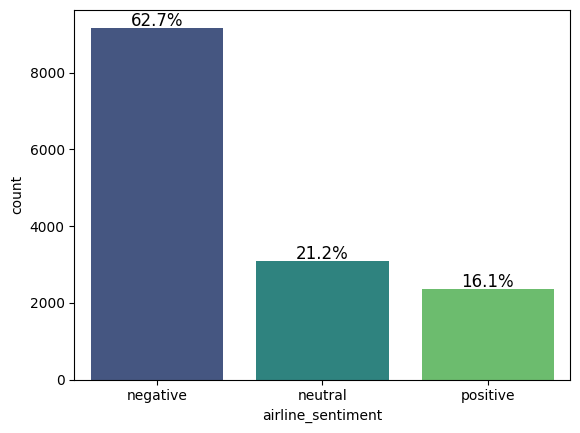

In [ ]:
# create labled barplot for airline_sentiment column
labeled_countplot(data,"airline_sentiment", perc=True)

airline_sentiment being our labeled/target column, there is imbalance in the data.

The negative tweets are:


*   Almost 4 times as many as the positive tweets and
*   3 times as many as the nuetral tweets



  



In [ ]:
# show number of tweets by airline
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

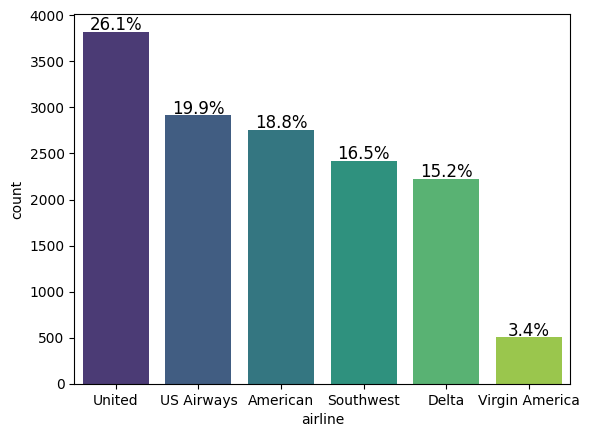

In [ ]:
# create labeled barplot of number of tweets by airline
labeled_countplot(data,'airline',perc=True)

United Airlines has the most tweets - 26.1% and Virgin America has the least number of tweets - 3.4%.

Given that Virgin America has a very small fleet, comparatively fewer flights/lesser routes, relatively fewer tweets are expected.

Since airlines with large fleet tend to generate more tweets, we will look into the positive to negative tweet ratio for a given airline.

In [ ]:
# Let us look at the tweet sentiment breakdown per airline
data.groupby('airline')['airline_sentiment'].value_counts()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

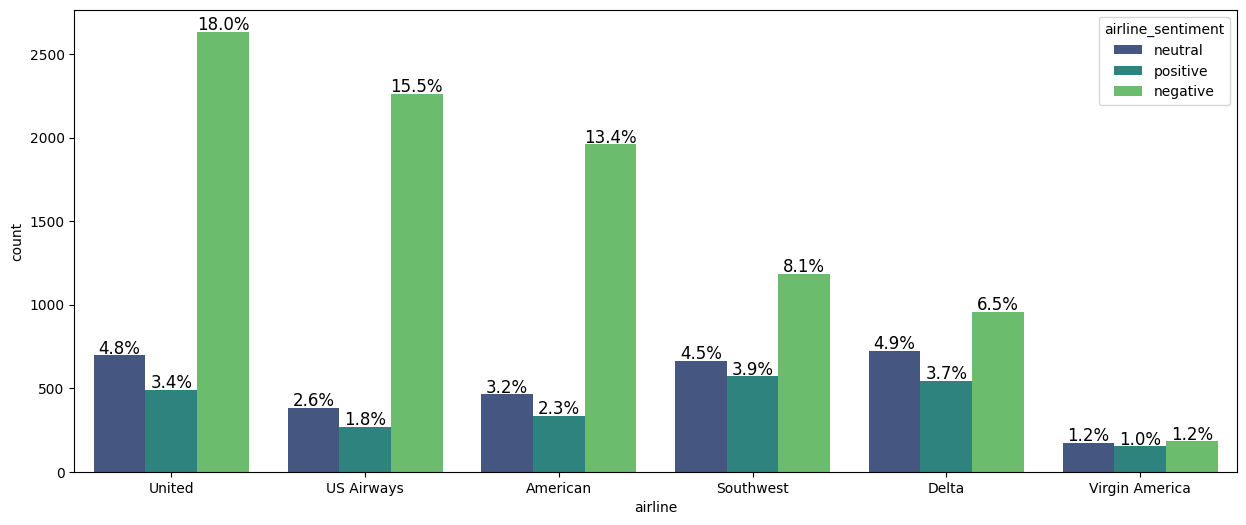

In [ ]:
# Let us visualize the tweet sentiment breakdown per airline
rcParams['figure.figsize'] = 15,6
labeled_countplot(data,'airline','airline_sentiment',perc=True)

Inspecting the tweet sentiment ratio, it definitely looks Virgin America was well recieved by the passengers with equal number of positive, neutral and negative tweets. Closely following Virgin America are Delta and Southwest.

US Airways seems to have received about 8 times more negative tweets than the postive tweets.

Again the data/tweets were all collected in one week in Feb, 2015. So this breakdown does not necessarily depict the overall airline acceptance/credibaility.

In [ ]:
# Let us inspect the top reasons for negative tweets
data['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

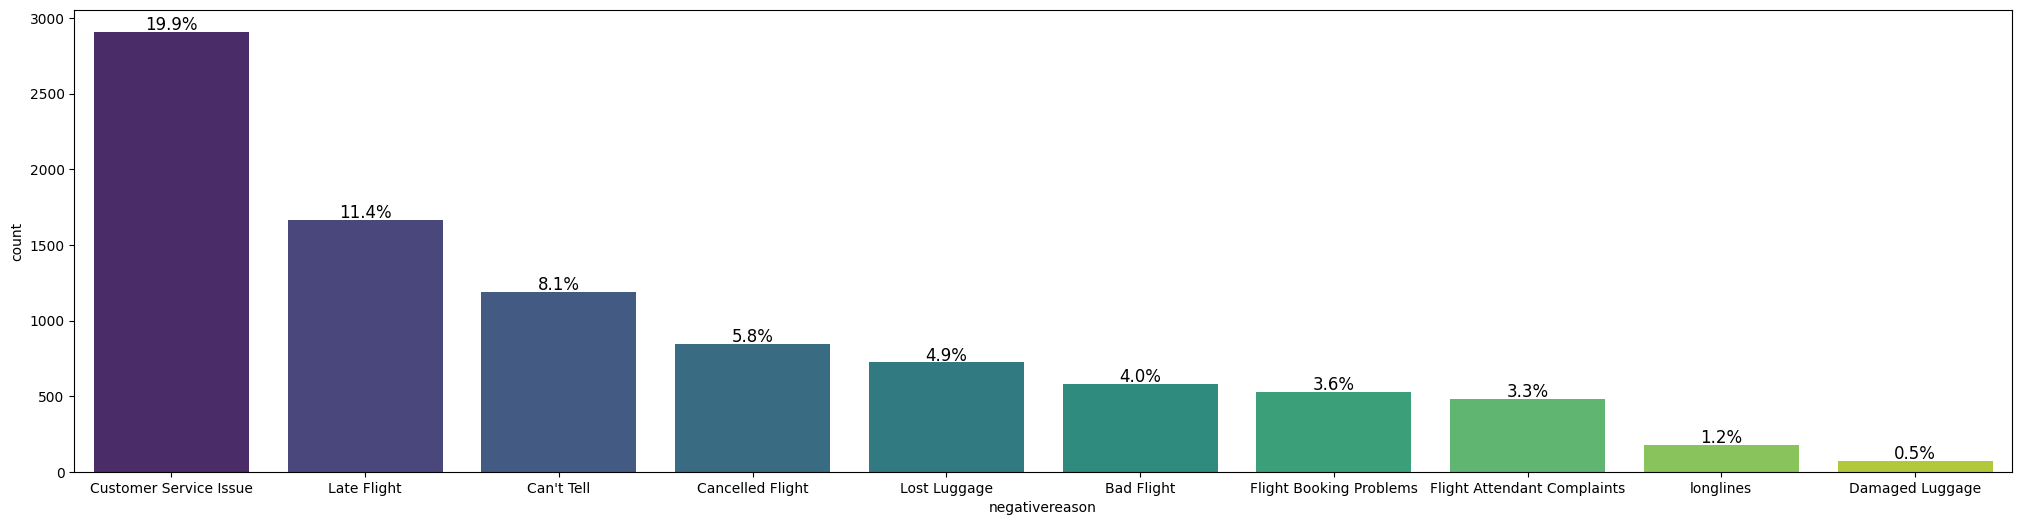

In [ ]:
# Let us visualize the top reasons for the negative tweets
rcParams['figure.figsize'] = 25,6
labeled_countplot(data,'negativereason',perc=True)

Customer Service Issue, Late Flight, Can't Tell, Cancelled Flight, Lost Luggage are the top 5 reasons that are contributing to the negative tweets.

# Word Cloud for Positive Reviews

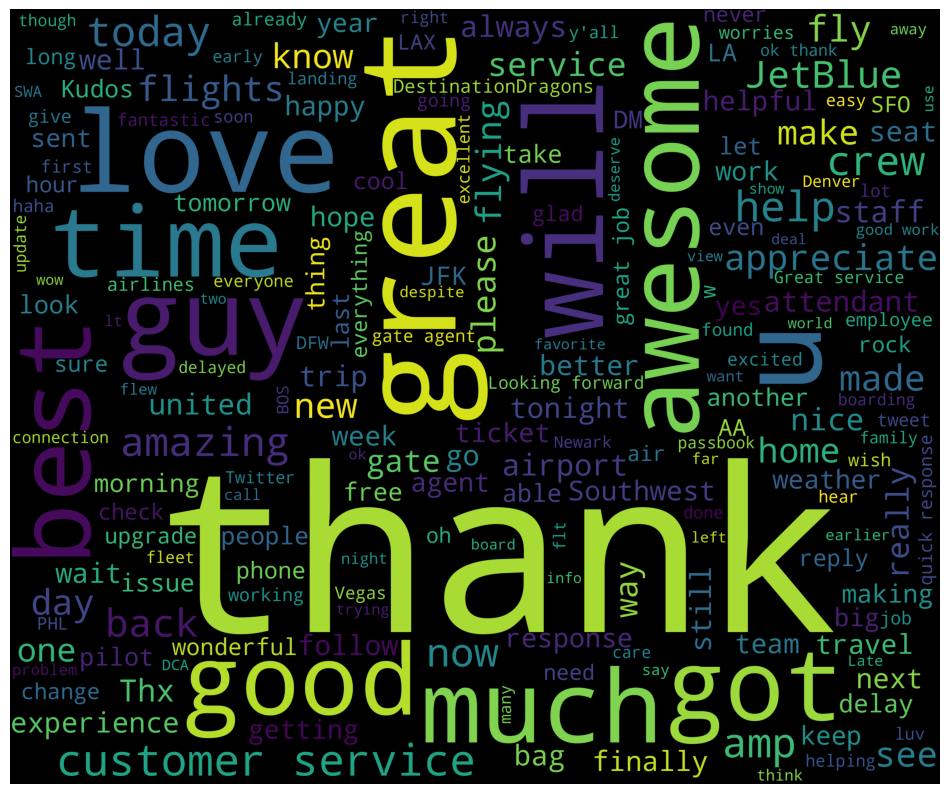

In [ ]:
stop_words = list(STOPWORDS)
#Let us also remove the expected words that would be part of the tweets irrespective of the sentiment and so will not add to the predictive power.
custom_stop_words = ['flight', 'plane', 'airline']
stop_words = set(stop_words + custom_stop_words)

positive_tweets=data[data['airline_sentiment']=='positive']
words = ' '.join(positive_tweets['text'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



As expected, thank, awesome, great, best, love, good, always, amazing, customer service, help, appreciate are the most common words found in the positive tweets.

It is suprising to see 'JetBlue' show up as a frequent word in the positive tweets inspite of JetBlue not being one of the 6 airlines (United, American, Delta, Southwest, US Airways and Virgin America) that the tweets pertain to.

# Word Cloud for Negative Reviews

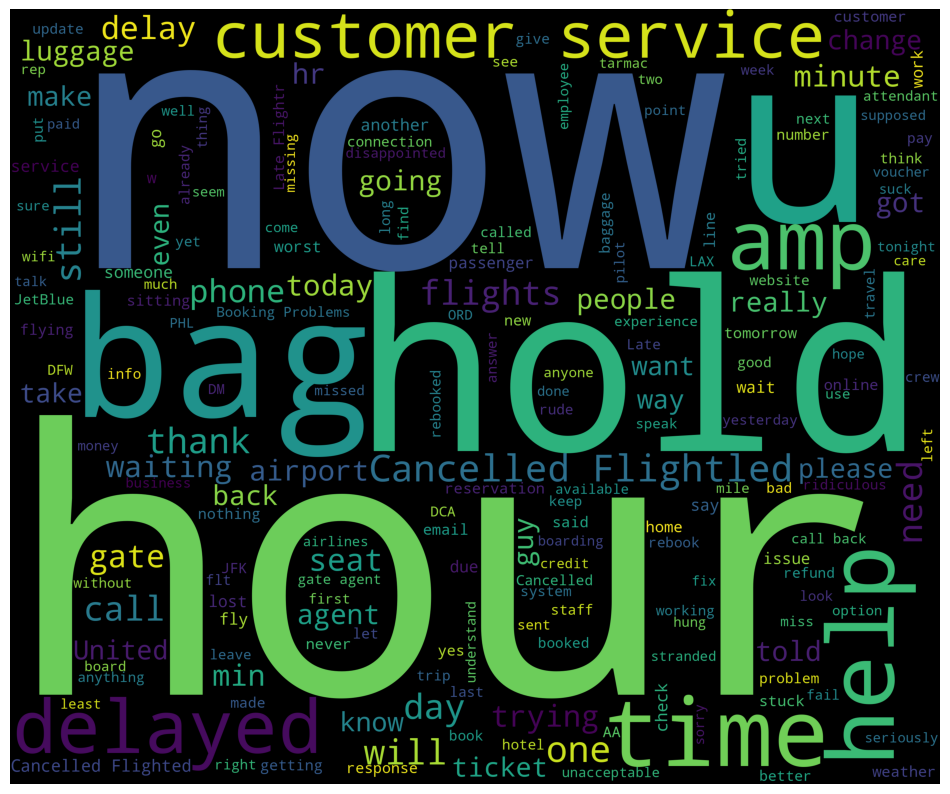

In [ ]:
stop_words = list(STOPWORDS)
#Let us also remove the expected words that would be part of the tweets irrespective of the sentiment and so will not add to the predictive power.
custom_stop_words = ['flight', 'plane', 'airline']
stop_words = set(stop_words + custom_stop_words)

negative_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(negative_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

hour, now, hold, bag, help, time, delayed, customer service, cancelled flight, waiting are the most common words found in the negative tweets.

# Understanding of Data Columns - Dropping unnecessary columns

In [ ]:
#Only 2 columns are of value for building the model - text & airline_sentiment.
#Let us go ahead and drop the rest of the columns before the Data Preprocessing step.
list_of_columns = data.columns.to_list()
# identify columns used for model building
columns = ['text','airline_sentiment']
# identify columns to be dropped
drop_columns = [col for col in list_of_columns if col not in columns]
# drop all other columns except “text” and “airline_sentiment”
data = data.drop(columns = drop_columns)


In [ ]:
#Let us check the shape of the updated dataframe and make sure we now have just the 2 columns
data.shape

(14640, 2)

In [ ]:
#Let us take a look at the first 5 rows of the updated dataframe
data.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


#Data Pre-processing

Remove html tags.

Replace contractions in string. (e.g. replace I'm --> I am) and so on.

Remove numbers.

Remove urls.

Remove mentions.

Tokenization.

Remove non-ascii (special characters)

Remove punctuations

Convert all words into lower case.

Remove hashtags.

Remove Stopwords - include custom words to be removed (flight, plane, airline)

Lemmatize the words



In [ ]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# remove the url's present in the text
def remove_urls(text):
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_urls(text)
    text = remove_mention(text)
    text = remove_numbers(text)
    return text
data['text'] = data['text'].apply(lambda x: clean_text(x))
data.head()


,airline_sentiment,text
0,neutral,What said.
1,positive,plus you have added commercials to the experi...
2,neutral,I did not today... Must mean I need to take a...
3,negative,"it is really aggressive to blast obnoxious ""e..."
4,negative,and it is a really big bad thing about it


**Tokenization of data**

In [ ]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,"[What, said, .]"
1,positive,"[plus, you, have, added, commercials, to, the,..."
2,neutral,"[I, did, not, today, ..., Must, mean, I, need,..."
3,negative,"[it, is, really, aggressive, to, blast, obnoxi..."
4,negative,"[and, it, is, a, really, big, bad, thing, abou..."


In [ ]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords))
custom_words_to_be_removed = ['flight', 'plane', 'airline']
stopwords = list(set(stopwords)) + custom_words_to_be_removed
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# remove hashtags
def remove_hash(words):
   """Remove hashtags from list of tokenized words"""
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_hash(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)


data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

In [ ]:
pd.set_option('display.max_colwidth', None)

**Let us print the first 5 rows of data after pre-processing**

In [ ]:
#Let us display the first 5 rows and inspect the pre-processed data in the text column.
data.head()

,airline_sentiment,text
0,neutral,say
1,positive,plus add commercials experience tacky
2,neutral,today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainment guests face little recourse
4,negative,really big bad thing


# Supervised Learning for Sentiment Analysis

**Text Vectorization - Bag of Words (CountVectorizer)**

In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are d unique words in our dictionary then for every review the vector will be of length d and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=2000)  # Keep only 2000 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data['text'])

data_features = data_features.toarray()

In [ ]:
# show shape of the feature vector
data_features.shape #Shape of the feature vector

(14640, 2000)

In [ ]:
X = data_features

y = data.airline_sentiment

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,stratify=y)

**Let us confirm that the composition/ratio of the 3 values in the target variable has been maintained in both the training and test datasets.**

In [ ]:
y.value_counts(normalize=True)

negative   0.63
neutral    0.21
positive   0.16
Name: airline_sentiment, dtype: float64

In [ ]:
y_train.value_counts(normalize=True)

negative   0.63
neutral    0.21
positive   0.16
Name: airline_sentiment, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

negative   0.63
neutral    0.21
positive   0.16
Name: airline_sentiment, dtype: float64

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

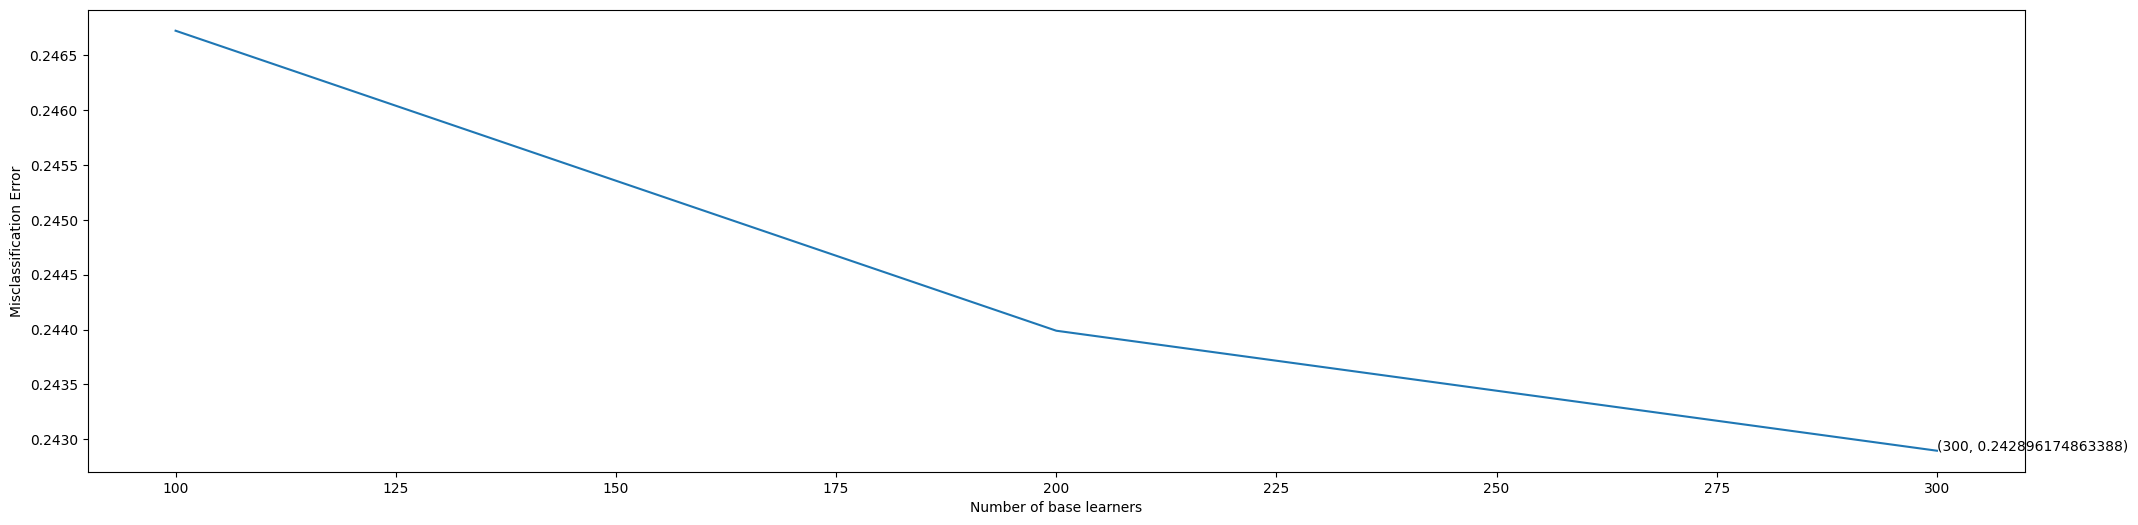

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each  estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Let's create a list of the 3 unique values in the target variable. This list will come handy
# while generating the classification report and the confusion matrix.
targets = sorted(data.airline_sentiment.unique().tolist())
print(targets)

['negative', 'neutral', 'positive']


# Model Building and Evaluation


**Model 1 - RandomForestClassifier using Bag of Words (CountVectorizer)**

In [ ]:
# Training the best model and calculating accuracy on test data.
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)



0.7622950819672131

**Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the 3 classes.**

In [ ]:
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = targets))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

    negative       0.81      0.89      0.85      2294
     neutral       0.61      0.48      0.54       775
    positive       0.71      0.62      0.66       591

    accuracy                           0.76      3660
   macro avg       0.71      0.67      0.68      3660
weighted avg       0.75      0.76      0.75      3660

Accuracy of the model is :  0.7622950819672131


**Confusion Matrix - RandomForestClassifier built using BagOfWords (CountVectorizer)**

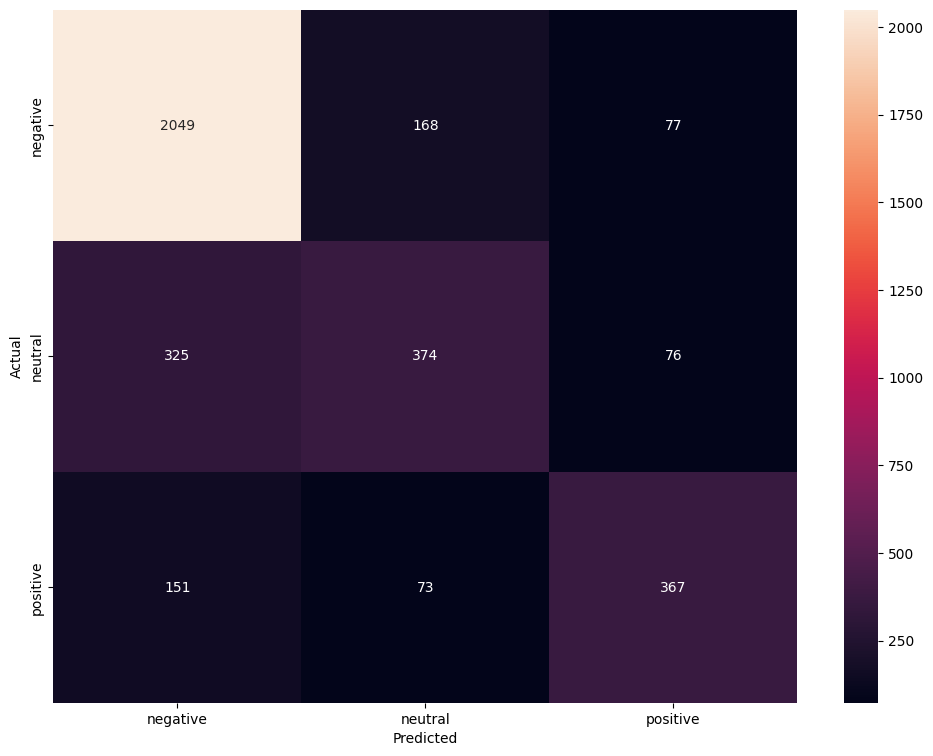

In [ ]:
#create confusion matrix for Count Vectorizer
cm_count=confusion_matrix(y_test,count_vectorizer_predicted )

plt.figure(figsize=(12,9))
sns.heatmap(cm_count,annot=True,fmt='d',xticklabels=targets , yticklabels= targets)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 Model 1 is classifying 2,049 out of 2,294 negative tweets correctly (91%), 374 out of 775 neutral tweets correctly (48%), and 367 out of 591 positive tweets correctly (62%)

**WordCloud of the top 40 features identified by Bag of Words (CountVectorizer)**

thank,delay,great,hours,cancel,love,awesome,hold,bag,call,get,best,hour,time,please,amaze,wait,customer,service,worst,would,tell,fly,still,help,never,go,hrs,make,say,lose,dm,phone,miss,need,fleek,flight,late,try,destinationdragons,
 
 


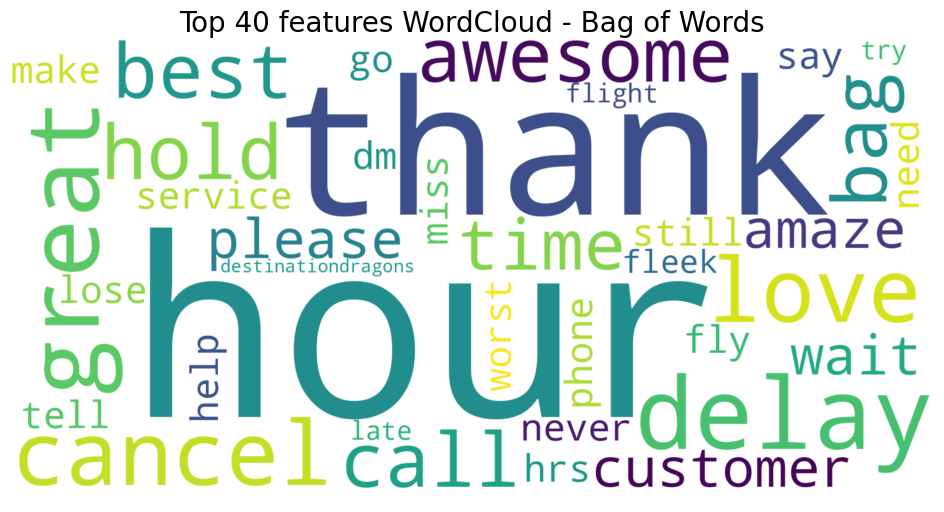

In [ ]:
all_features = Count_vec.get_feature_names_out()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 features into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud - Bag of Words', fontsize=20)
plt.axis("off")
plt.show()

**Text Vectorization - TF-IDF (Term Frequency - Inverse Document Frequency).**

 It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=2000)
data_features = tfidf_vect.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 2000)

In [ ]:
X = data_features

y = data.airline_sentiment

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,stratify=data['airline_sentiment'])

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [ ]:
# K-Fold Cross - validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

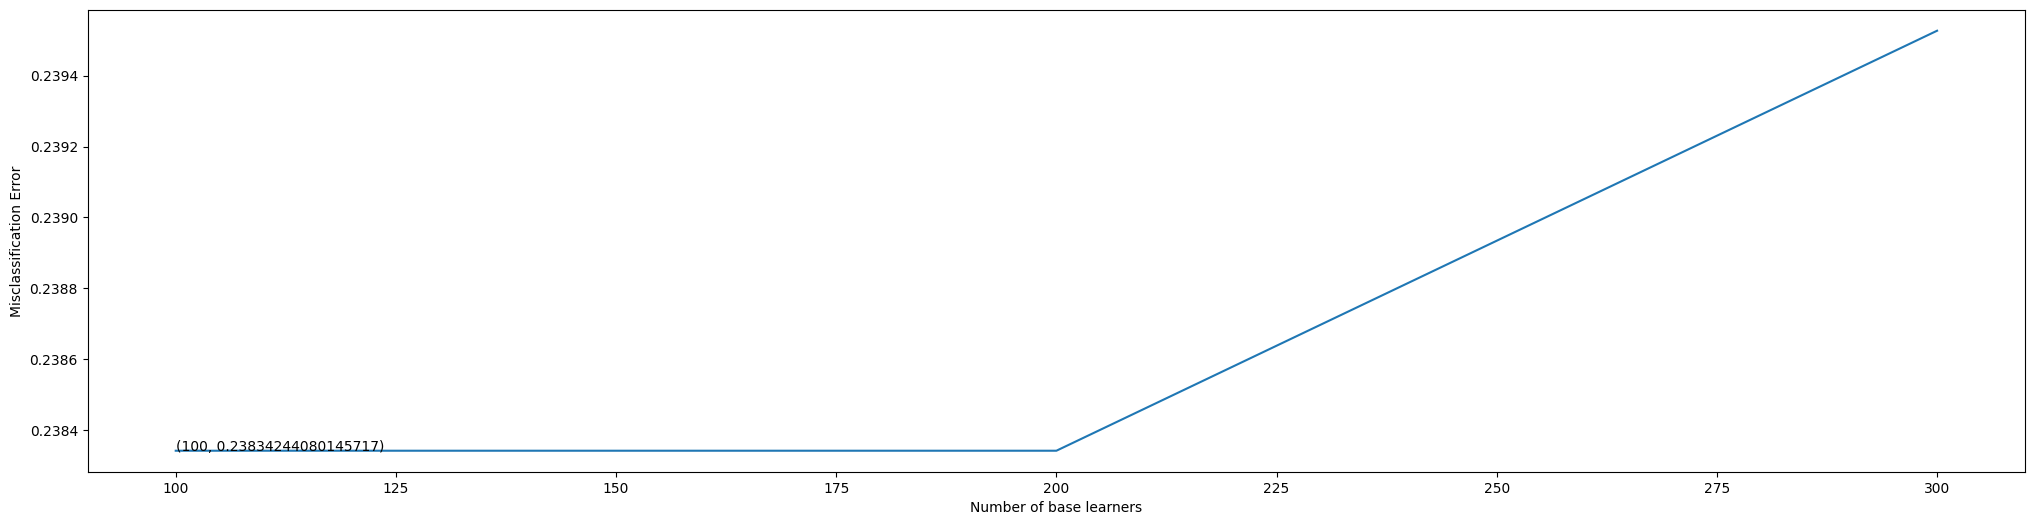

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]
optimal_learners = base_ln[error.index(min(error))]
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

# Model Building and Evaluation

**Model2 - RandomForestClassifier using TF-IDF**

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)


Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the 3 classes.

In [ ]:
print(classification_report(y_test , tf_idf_predicted , target_names = targets))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

    negative       0.80      0.92      0.85      2294
     neutral       0.64      0.46      0.54       775
    positive       0.75      0.58      0.65       591

    accuracy                           0.77      3660
   macro avg       0.73      0.65      0.68      3660
weighted avg       0.75      0.77      0.75      3660

Accuracy of the model is :  0.7658469945355191


**Confusion Matrix - RandomForestClassifier built using TF-IDF**

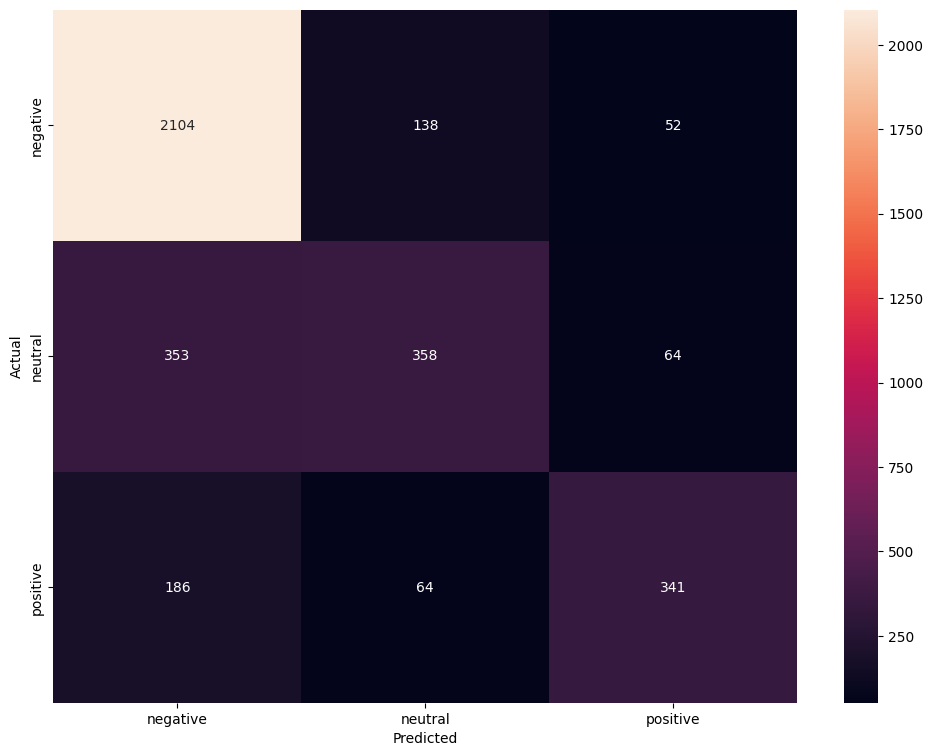

In [ ]:
#Create confusion matrix for the results predicted by RandomForestClassifier built using TF_IDF
cm_count=confusion_matrix(y_test,tf_idf_predicted )

plt.figure(figsize=(12,9))
sns.heatmap(cm_count,annot=True,fmt='d',xticklabels=targets , yticklabels= targets)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model 2 is classifying 2,104 out of 2,294 negative tweets correctly (92%), 358 out of 775 neutral tweets correctly (46%), and 341 out of 591 positive tweets correctly (58%)

**WordCloud of the top 40 features identified by TF-IDF**

thank, great, delay, love, cancel, get, hours, hold, awesome, call, bag, best, dm, customer, time, wait, fly, please, amaze, hour, service, make, go, fleek, would, flight, tell, help, still, say, good, phone, worst, fleet, try, send, never, appreciate, hrs, follow, 
 
 


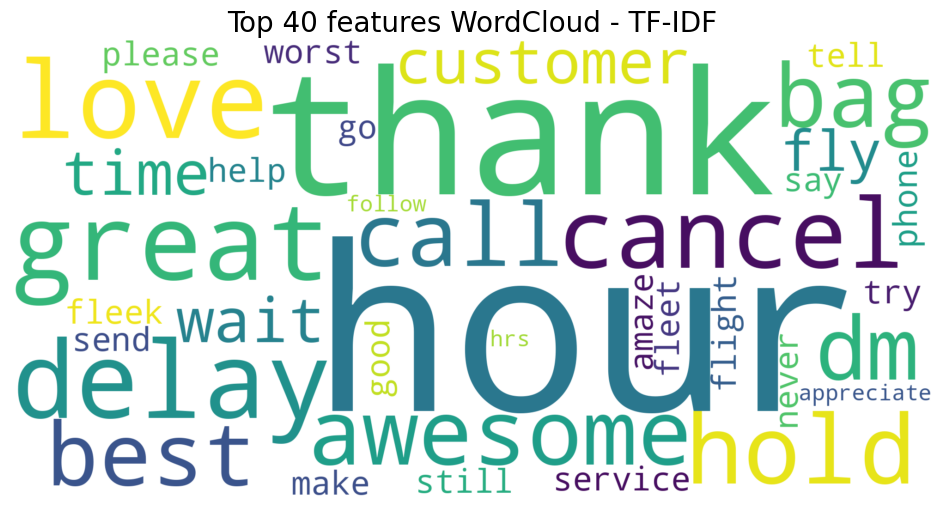

In [ ]:
all_features = tfidf_vect.get_feature_names_out()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '

print(top_features)

print(" ")
print(" ")

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud - TF-IDF', fontsize=20)
plt.axis("off")
plt.show()

**Comparing the accuracies of Supervised Learning methods i.e Count Vectorizer and TF-IDF**

In [ ]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df['count_vectorizer_predicted'] = count_vectorizer_predicted
df['tf_idf_predicted'] = tf_idf_predicted
df.head(10)

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,neutral,negative,negative
1,negative,negative,negative
2,negative,negative,negative
3,negative,negative,negative
4,positive,positive,positive
5,neutral,neutral,neutral
6,positive,positive,positive
7,negative,negative,negative
8,negative,negative,negative
9,neutral,negative,negative


Both methods seem to have incorrectly analyzed 2 out of 3 tweets that are neutral in sentiment.

Both methods seem to incorrectly categorize the 2 neutral tweets as being negative in sentiment.

The rest of the tweets (8) are correctly classified by both learning methods.

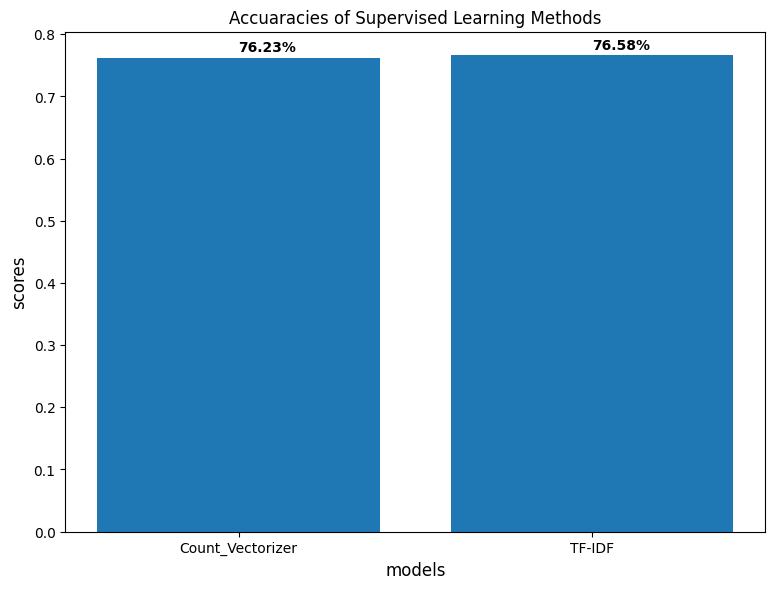

In [ ]:
#Create a bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

TF-IDF shows a slightly better performance than Count Vectorizer, because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

TF-IDF also gave a slightly higher accuracy (92% vs 91%) in predicting tweets with a negative sentiment - since timely reaction/response to negative tweets is critical to smooth operation of the airline, TF-IDF is our preferred model.



# Summary

We created two classification models to predict the sentiments of tweets pertaining to six different airlines - United, American, Delta, Southwest, US Airways and Virgin America.

All the tweets were collected during a window of one week in Feb of 2015.

There was imbalance in the data.
The negative tweets were

*   Almost 4 times as many as the positive tweets and
*   3 times as many as the nuetral tweets

WordClouds were drawn for the top 40 words found in the positive tweets as well as in the negative tweets. JetBlue showed up as frequent word in the positive tweets inspite of it not being one of the 6 airlines that the tweets pertain to.

The below data pre-processing techniques were employed in order to change the raw/noisy data (tweets in our case) into a clean data set making it suitable for the model. The pre-processed data also increases the accuracy and efficiency of the model.


*   Remove html tags
*   Replace contractions in string. (e.g. replace I'm --> I am) and so on.
*   Remove numbers
*   Remove urls
*   Remove mentions
*   Tokenization
*   Remove non-ascii (special characters)
*   Remove punctuations
*   Convert all words into lower case
*   Remove hashtags
*   Remove Stopwords - included custom words to be removed (flight, plane, airline) as these words would appear irrespective of the sentiment behind the tweets and so do not add to the predictive power of the model.
*   Lemmatize the words


Bag of Words (CountVectorizer) and TF-IDF vectorizer were the 2 vectorization techniques employed to convert input data from its raw format (tweets in our case ) into vectors of real numbers which is the format that ML models support.

2 classification models were built both using Random Forest classification  - For the first model, we employed Bag of Words (CountVectorizer). For the second model, we used TF-IDF vectorizer.

Model 2 built using the TF-IDF vectorizer yeilded slightly better results in terms of overall accuracy. TF-IDF also gave a slightly higher accuracy (92% vs 91%) in predicting tweets with a negative sentiment - since timely reaction/response to negative tweets is critical to smooth operation of the airline, TF-IDF is our preferred model.

Now that we have trained models and a predict function, we can pass in any tweet and the models will predict the sentiment. This can be leveraged by the airlines to react to negative sentiments lot faster than the traditional/manual methods.   
